# Phase 1 Project

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## Importing Files

### Importing Box Office Mojo Movie  Gross

In [3]:
BOM_df = pd.read_csv('../../data/bom.movie_gross.csv.gz')
BOM_df.head(1)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010


### Importing IMDB

### Importing Rotten Tomatoes

#### Rotten Tomatoes info

In [4]:
rt_movies_df = pd.read_csv('../../data/rt.movie_info.tsv.gz', delimiter = "\t")
rt_movies_df.head(1)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN


#### Rotten Tomatoes Reviews

In [5]:
rt_review_df = pd.read_csv('../../data/rt.reviews.tsv.gz',delimiter='\t',encoding = 'cp1252')
rt_review_df.head(1)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"


### Importing TheMovieDB (I look Over)

In [6]:
tmdb_df = pd.read_csv('../../data/tmdb.movies.csv.gz', index_col = 0)

In [7]:
tmdb_df.head(1)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


Analyzing TheMovieDB to determine if we as a group want to use the data frame.
Conclusion: Do not want to do furter analysis or use data in project.

In [8]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [9]:
tmdb_df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [10]:
#Filtered data fram to contain values only containing movies released in the past decade
past_decade_df = tmdb_df.loc[(tmdb_df['release_date'] >= '2012-01-01')]
past_decade_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
258,"[18, 35]",39356,en,Boy,7.759,2012-03-02,Boy,7.5,149
530,"[18, 53]",55061,en,Frankie & Alice,3.690,2014-04-04,Frankie & Alice,5.7,43
587,"[18, 14]",61980,en,Seeing Heaven,3.209,2012-07-16,Seeing Heaven,3.7,9
1110,"[18, 35, 14, 10749]",96316,en,I Kissed a Vampire,1.400,2012-03-30,I Kissed a Vampire,5.3,6
1537,[18],182026,en,Stranger Things,0.802,2013-04-05,Stranger Things,8.0,14


In [11]:
past_decade_df['original_language'].value_counts()

en    18771
fr      370
es      361
ja      211
ru      208
      ...  
kk        1
yi        1
cr        1
mi        1
xh        1
Name: original_language, Length: 71, dtype: int64

In [12]:
past_decade_df['vote_count'].sort_values(ascending=False)

17383    20175
5179     19673
11032    18597
11021    17958
5189     15725
         ...  
16030        1
16032        1
16034        1
16035        1
15858        1
Name: vote_count, Length: 21189, dtype: int64

In [13]:
past_decade_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21189 entries, 258 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          21189 non-null  object 
 1   id                 21189 non-null  int64  
 2   original_language  21189 non-null  object 
 3   original_title     21189 non-null  object 
 4   popularity         21189 non-null  float64
 5   release_date       21189 non-null  object 
 6   title              21189 non-null  object 
 7   vote_average       21189 non-null  float64
 8   vote_count         21189 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.6+ MB


In [14]:
past_decade = past_decade_df['popularity'].sort_values(ascending=False)
past_decade

23811    80.773
11019    78.123
23812    60.534
11020    53.783
5179     50.289
          ...  
13358     0.600
13357     0.600
13356     0.600
13355     0.600
26516     0.600
Name: popularity, Length: 21189, dtype: float64

In [15]:
past_decade.value_counts()

0.600     5569
1.400      493
0.840      473
0.626       67
0.631       61
          ... 
18.335       1
13.344       1
14.991       1
4.980        1
7.525        1
Name: popularity, Length: 6561, dtype: int64

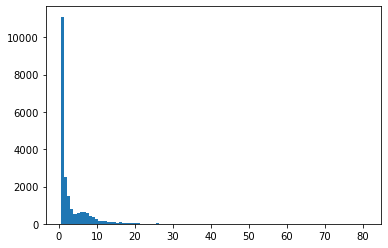

In [16]:
fig, ax=plt.subplots()
ax.hist(x=past_decade, bins=100);

In [17]:
past_decade_no_lows = []
for value  in past_decade.value_counts():
    if value <70:
        past_decade_no_lows.append(value)
    else:
        continue
len(past_decade_no_lows)

6558

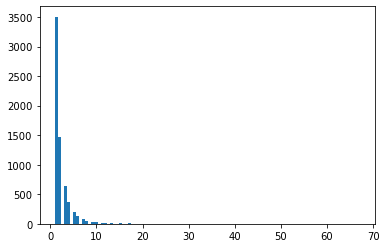

In [18]:
fig, ax=plt.subplots()
ax.hist(x=past_decade_no_lows, bins=100);

In [19]:
past_decade.value_counts()

0.600     5569
1.400      493
0.840      473
0.626       67
0.631       61
          ... 
18.335       1
13.344       1
14.991       1
4.980        1
7.525        1
Name: popularity, Length: 6561, dtype: int64

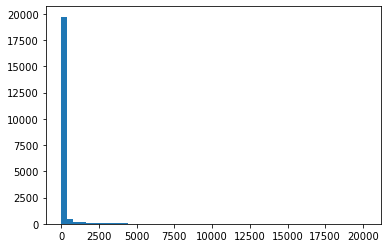

In [20]:
fig, ax=plt.subplots()
ax.hist(x=past_decade_df['vote_count'], bins=50);

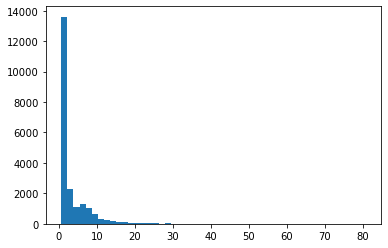

In [21]:
fig, ax=plt.subplots()
ax.hist(x=past_decade_df['popularity'], bins=50);

### Importing TheNumbers

In [22]:
df_th = pd.read_csv('../../data/tn.movie_budgets.csv.gz')
df_th.head(1)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


In [23]:
df_th.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


# Exploring what types of films are currently doing the best at the box office

I started looking at information within this data base before consulting with team.  
We decided not to use this data set for our project.  

In [24]:
BOM_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [25]:
BOM_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [26]:
BOM_df['domestic_gross'].values

array([4.150e+08, 3.342e+08, 2.960e+08, ..., 2.500e+03, 2.400e+03,
       1.700e+03])

In [27]:
BOM_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [28]:
BOM_df[BOM_df['domestic_gross'].isna() == True].head()

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010


In [29]:
BOM_nona_domestic = BOM_df.dropna(subset = ['domestic_gross'])

In [30]:
BOM_nona_domestic['domestic_gross'].sort_values(ascending=False)

1872    936700000.0
3080    700100000.0
3079    678800000.0
1873    652300000.0
727     623400000.0
           ...     
1018          400.0
2757          300.0
2756          300.0
2321          300.0
1476          100.0
Name: domestic_gross, Length: 3359, dtype: float64

# Pulling data from WIKI

Observing Microsoft IPs with the gaming companies

In [31]:
#importing libraries for web scraping.  Grabbed single charts from Wiki
import requests
from bs4 import BeautifulSoup

In [32]:
r = requests.get('https://en.wikipedia.org/wiki/List_of_mergers_and_acquisitions_by_Microsoft')

In [33]:
soup = BeautifulSoup(r.text)

In [34]:
table = soup.find('table', {'class': "wikitable sortable"})

In [35]:
len(table.find_all('tr')) #length matches the table on Wiki

271

In [36]:
Microsoft_Acquisitions_df = pd.read_html(table.prettify())[0]
Microsoft_Acquisitions_df.head()

,Date,Company,Business,Country,Value ( USD ),References
0,"July 30, 1987","Forethought, Inc.",Computer software,United States,14000000,[25]
1,"March 31, 1991",Consumers Software,Software,Canada,—,[26]
2,"June 29, 1992",Fox Software,PC database software,United States,—,[27]
3,"February 28, 1994",Softimage,Wholesale 3-D visualization software,Canada,130000000,[28]
4,"September 27, 1994",Altamira Software,Software,United States,—,[29]


In [37]:
Microsoft_Acquisitions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             270 non-null    object
 1   Company          270 non-null    object
 2   Business         270 non-null    object
 3   Country          270 non-null    object
 4   Value (  USD  )  256 non-null    object
 5   References       268 non-null    object
dtypes: object(6)
memory usage: 12.8+ KB


In [38]:
Microsoft_Acquisitions_df['Business'].value_counts() #~10% of of acquisitions by Microsoft according to this chart were in the 
                                                        #videa gaming sector

Software                                 37
Video games                              19
Internet software                         8
Internet service provider                 4
Applications                              3
                                         ..
Advertising yield management software     1
Video game advertising                    1
Disaster recovery solutions               1
Master data management                    1
Electronic games                          1
Name: Business, Length: 193, dtype: int64

In [39]:
Microsoft_Video_Games_df = Microsoft_Acquisitions_df[Microsoft_Acquisitions_df['Business'] == "Video games"]
Microsoft_Video_Games_df #Filtered only businesses that were video games from the Microsoft acquisitions table

,Date,Company,Business,Country,Value ( USD ),References
33,"January 11, 1999",FASA Interactive,Video games,United States,—,[59]
36,"April 19, 1999",Access Software,Video games,United States,—,[62]
51,"June 19, 2000",Bungie,Video games,United States,—,[77]
55,"December 5, 2000",Digital Anvil,Video games,United States,—,[81]
59,"May 3, 2001",Ensemble Studios,Video games,United States,—,[85]
68,"September 24, 2002",Rare,Video games,United Kingdom,375000000,[94]
95,"April 6, 2006",Lionhead Studios,Video games,United Kingdom,—,[121]
150,"October 12, 2011",Twisted Pixel Games,Video games,United States,—,[176]
152,"June 5, 2012",Press Play,Video games,Denmark,—,[179]
172,"November 6, 2014",Mojang,Video games,Sweden,NaN,[199]


In [40]:
Microsoft_Owned_Studios = list(Microsoft_Video_Games_df['Company']
.str.replace(" Games", "")
.str.replace(" Entertainment", "")
.str.replace(" Media", "")
.str.replace(" Studios", "")
.str.replace(" Productions", "")
.str.replace(" Blizzard", ""))+["Bethesda"]+["Microsoft"]

In [41]:
Microsoft_Owned_Studios

['FASA Interactive',
 'Access Software',
 'Bungie',
 'Digital Anvil',
 'Ensemble',
 'Rare',
 'Lionhead',
 'Twisted Pixel',
 'Press Play',
 'Mojang',
 'Ninja Theory',
 'Undead Labs',
 'Compulsion',
 'Playground',
 'inXile',
 'Obsidian',
 'Double Fine',
 'ZeniMax',
 'Activision',
 'Bethesda',
 'Microsoft']

# Couldn't import this chart 

Note: Ask group members if I should load chart and if so need help!

In [42]:
r1 = requests.get('https://en.wikipedia.org/wiki/Xbox_Game_Studios')

In [43]:
soup1 = BeautifulSoup(r1.text)

In [44]:
table1 = soup1.find('table', {'class': "wikitable sortable jquery-tablesorter"})

In [45]:
table1

# Kaggle Video Game Data

In [46]:
#url = https://www.kaggle.com/coffeepot/videogame-sales/data
#creator of db = RYANCOX
video_game_df = pd.read_csv('../../data/Video_Games_Sales_as_at_22_Dec_2016.csv.zip')
video_game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


<BarContainer object of 581 artists>

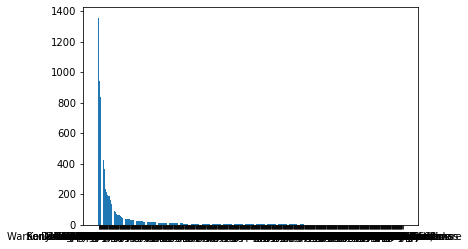

In [47]:
plt.bar(x=video_game_df['Publisher'].value_counts().index, height=video_game_df['Publisher'].value_counts())
#Just want to see the distribution of Publishers.  Dont need to pull names

In [48]:
# Isolating Microsoft Game Studios, Activision, Bethesda Softworks (2 branches of microsoft + Activision)
# Did Ind. first to test and see individual publishers stats
Activision_df = video_game_df.loc[(video_game_df['Publisher'] == "Activision")]
Activision_df.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M


In [49]:
Activision_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 29 to 16713
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             985 non-null    object 
 1   Platform         985 non-null    object 
 2   Year_of_Release  976 non-null    float64
 3   Genre            985 non-null    object 
 4   Publisher        985 non-null    object 
 5   NA_Sales         985 non-null    float64
 6   EU_Sales         985 non-null    float64
 7   JP_Sales         985 non-null    float64
 8   Other_Sales      985 non-null    float64
 9   Global_Sales     985 non-null    float64
 10  Critic_Score     569 non-null    float64
 11  Critic_Count     569 non-null    float64
 12  User_Score       783 non-null    object 
 13  User_Count       573 non-null    float64
 14  Developer        782 non-null    object 
 15  Rating           781 non-null    object 
dtypes: float64(9), object(7)
memory usage: 130.8+ KB


In [50]:
Activision_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,976.000000,985.000000,985.000000,985.000000,985.000000,985.000000,569.000000,569.000000,573.000000
mean,2007.315574,0.439178,0.219188,0.006812,0.076964,0.742294,69.667838,27.029877,211.874346
std,5.845428,0.899353,0.589623,0.042517,0.208207,1.628710,13.842564,20.201385,809.452931
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,26.000000,3.000000,4.000000
25%,2005.000000,0.090000,0.010000,0.000000,0.010000,0.120000,60.000000,11.000000,9.000000
50%,2008.000000,0.190000,0.040000,0.000000,0.020000,0.280000,72.000000,21.000000,19.000000
75%,2011.000000,0.420000,0.170000,0.000000,0.050000,0.630000,80.000000,41.000000,61.000000
max,2016.000000,9.700000,6.210000,0.650000,2.420000,14.730000,98.000000,100.000000,9629.000000


In [51]:
MGS_df = video_game_df.loc[(video_game_df['Publisher'] == "Microsoft Game Studios")]
MGS_df.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.0,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E


In [52]:
MGS_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 14 to 16428
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             191 non-null    object 
 1   Platform         191 non-null    object 
 2   Year_of_Release  191 non-null    float64
 3   Genre            191 non-null    object 
 4   Publisher        191 non-null    object 
 5   NA_Sales         191 non-null    float64
 6   EU_Sales         191 non-null    float64
 7   JP_Sales         191 non-null    float64
 8   Other_Sales      191 non-null    float64
 9   Global_Sales     191 non-null    float64
 10  Critic_Score     147 non-null    float64
 11  Critic_Count     147 non-null    float64
 12  User_Score       154 non-null    object 
 13  User_Count       146 non-null    float64
 14  Developer        153 non-null    object 
 15  Rating           153 non-null    object 
dtypes: float64(9), object(7)
memory usage: 25.4+ KB


In [53]:
MGS_df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,147.000000,147.000000,146.000000
mean,2006.842932,0.824241,0.359372,0.017277,0.099005,1.300105,76.108844,50.748299,380.732877
std,4.443379,1.709090,0.625907,0.038810,0.207493,2.518805,12.372710,25.416488,670.255261
min,1996.000000,0.000000,0.000000,0.000000,0.000000,0.010000,28.000000,10.000000,6.000000
25%,2003.000000,0.050000,0.030000,0.000000,0.010000,0.100000,70.000000,30.500000,25.500000
50%,2006.000000,0.230000,0.080000,0.000000,0.020000,0.360000,79.000000,44.000000,70.500000
75%,2010.000000,0.735000,0.395000,0.020000,0.080000,1.280000,85.000000,74.000000,457.000000
max,2016.000000,15.000000,4.890000,0.240000,1.690000,21.810000,97.000000,106.000000,4100.000000


In [54]:
BS_df = video_game_df.loc[(video_game_df['Publisher'] == "Bethesda Softworks")]
BS_df.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
75,The Elder Scrolls V: Skyrim,X360,2011.0,Role-Playing,Bethesda Softworks,5.05,2.79,0.1,0.85,8.79,96.0,89.0,8.4,3589.0,Bethesda Game Studios,M


In [55]:
BS_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 75 to 16460
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             76 non-null     object 
 1   Platform         76 non-null     object 
 2   Year_of_Release  74 non-null     float64
 3   Genre            76 non-null     object 
 4   Publisher        76 non-null     object 
 5   NA_Sales         76 non-null     float64
 6   EU_Sales         76 non-null     float64
 7   JP_Sales         76 non-null     float64
 8   Other_Sales      76 non-null     float64
 9   Global_Sales     76 non-null     float64
 10  Critic_Score     52 non-null     float64
 11  Critic_Count     52 non-null     float64
 12  User_Score       64 non-null     object 
 13  User_Count       58 non-null     float64
 14  Developer        64 non-null     object 
 15  Rating           61 non-null     object 
dtypes: float64(9), object(7)
memory usage: 10.1+ KB


In [56]:
BS_df.describe()
# Critic columns are missing roughly 33% of data, so probably wont use

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,74.000000,76.000000,76.000000,76.000000,76.000000,76.000000,52.000000,52.000000,58.000000
mean,2011.351351,0.544211,0.418816,0.019737,0.136447,1.119079,72.019231,39.153846,967.517241
std,3.624243,0.878709,0.632574,0.046960,0.220095,1.685304,17.634070,23.268581,1710.805866
min,2002.000000,0.000000,0.000000,0.000000,0.000000,0.010000,27.000000,4.000000,4.000000
25%,2009.000000,0.090000,0.050000,0.000000,0.020000,0.172500,67.000000,21.750000,89.000000
50%,2011.000000,0.240000,0.205000,0.000000,0.060000,0.485000,76.000000,34.500000,345.500000
75%,2014.750000,0.552500,0.512500,0.012500,0.140000,1.295000,84.500000,57.000000,886.250000
max,2016.000000,5.050000,3.270000,0.250000,1.130000,8.790000,96.000000,89.000000,9073.000000


In [57]:
video_game_df.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E


In [58]:
video_no_NaN = video_game_df.dropna(subset= ['Publisher'])

In [59]:
('|'.join(Microsoft_Owned_Studios))

'FASA Interactive|Access Software|Bungie|Digital Anvil|Ensemble|Rare|Lionhead|Twisted Pixel|Press Play|Mojang|Ninja Theory|Undead Labs|Compulsion|Playground|inXile|Obsidian|Double Fine|ZeniMax|Activision|Bethesda|Microsoft'

In [60]:
Total_Microsoft_Df=video_no_NaN.loc[video_no_NaN['Publisher'].str.contains('|'.join(Microsoft_Owned_Studios))]
Total_Microsoft_Df['Publisher'].value_counts()

Activision                985
Microsoft Game Studios    191
Bethesda Softworks         76
Activision Value           29
Mojang                      5
Activision Blizzard         1
inXile Entertainment        1
Name: Publisher, dtype: int64

In [61]:
Total_Microsoft_Df[Total_Microsoft_Df['Publisher'].str.contains("Mojang")]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2360,Minecraft: Story Mode,X360,2015.0,Adventure,Mojang,0.48,0.33,0.0,0.08,0.88,NaN,NaN,NaN,NaN,NaN,NaN
2936,Minecraft: Story Mode,PS4,2015.0,Adventure,Mojang,0.25,0.33,0.0,0.11,0.69,NaN,NaN,NaN,NaN,NaN,NaN
2944,Minecraft: Story Mode,PS3,2015.0,Adventure,Mojang,0.27,0.31,0.0,0.11,0.69,NaN,NaN,NaN,NaN,NaN,NaN
3579,Minecraft: Story Mode,XOne,2015.0,Adventure,Mojang,0.30,0.21,0.0,0.05,0.56,NaN,NaN,NaN,NaN,NaN,NaN
10928,Minecraft: Story Mode,PC,2015.0,Adventure,Mojang,0.02,0.06,0.0,0.01,0.09,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
"""
Total_Microsoft_Df = video_game_df.loc[(video_game_df['Publisher'].str.contains("Bethesda")) | 
                                       (video_game_df['Publisher'].str.contains("Activision"))|
                                      (video_game_df['Publisher'].str.contains("Microsoft"))]
Total_Microsoft_Df['Publisher'].value_counts()
""";# Data frame containing Microsoft Game Studios, Activision, & Bethesda Softworks

In [63]:
Top_20_GS = Total_Microsoft_Df.groupby("Name").sum().sort_values(by= 'Global_Sales', ascending = False).head(20).reset_index()
Top_20_GS

,Name,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,Call of Duty: Black Ops,8040.0,17.57,9.35,0.59,3.31,30.82,410.0,214.0,4340.0
1,Call of Duty: Modern Warfare 3,8044.0,15.54,11.15,0.62,3.29,30.59,324.0,162.0,20053.0
2,Call of Duty: Black Ops II,8048.0,14.08,10.84,0.72,3.76,29.40,321.0,136.0,5041.0
3,Call of Duty: Ghosts,12078.0,14.94,8.89,0.48,3.08,27.40,369.0,101.0,5684.0
4,Call of Duty: Black Ops 3,10075.0,12.25,9.49,0.44,3.49,25.68,0.0,0.0,0.0
5,Call of Duty: Modern Warfare 2,6027.0,13.52,8.02,0.46,2.97,24.95,274.0,207.0,11201.0
6,Call of Duty: Advanced Warfare,10070.0,10.51,8.30,0.34,2.82,21.99,242.0,110.0,3905.0
7,Kinect Adventures!,2010.0,15.00,4.89,0.24,1.69,21.81,61.0,45.0,106.0
8,The Elder Scrolls V: Skyrim,10065.0,9.65,8.37,0.39,2.73,21.15,282.0,137.0,15189.0
9,Call of Duty 4: Modern Warfare,8028.0,9.99,5.75,0.42,2.04,18.19,355.0,176.0,4709.0


In [64]:
Top_20_NAS = Total_Microsoft_Df.groupby("Name").sum().sort_values(by= 'NA_Sales', ascending = False).head(20).reset_index()
Top_20_EUS = Total_Microsoft_Df.groupby("Name").sum().sort_values(by= 'EU_Sales', ascending = False).head(20).reset_index()
Top_20_JPS = Total_Microsoft_Df.groupby("Name").sum().sort_values(by= 'JP_Sales', ascending = False).head(20).reset_index()

# Global Sales Vizualizations

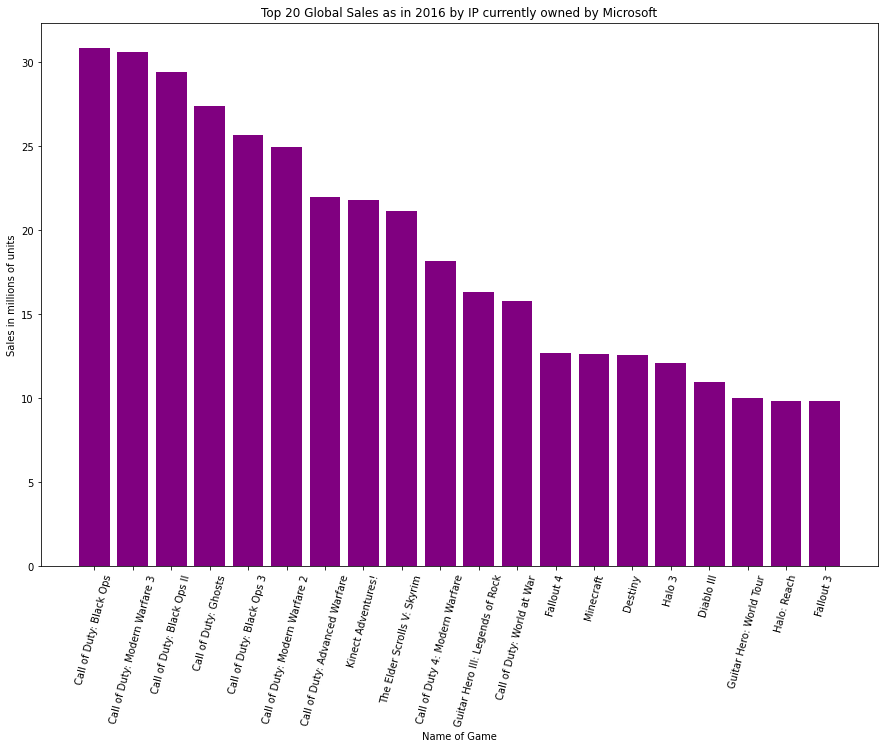

In [65]:
fig, ax = plt.subplots(figsize = (15,10))

ax.bar(x=Top_20_GS['Name'],
       height=Top_20_GS['Global_Sales'],
       color='purple')
ax.set_title("""Top 20 Global Sales as in 2016 by IP currently owned by Microsoft""")
ax.set_xlabel("Name of Game")
ax.set_ylabel("Sales in millions of units")
plt.xticks(rotation=75);

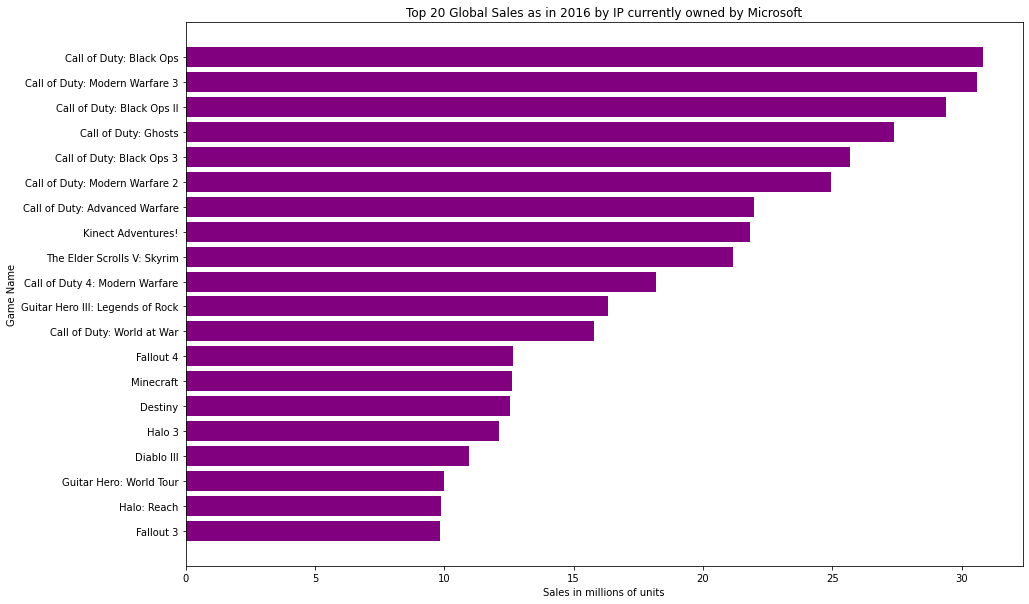

In [73]:
fig, ax = plt.subplots(figsize = (15,10))

ax.invert_yaxis()

ax.barh(y=Top_20_GS['Name'],
       width=Top_20_GS['Global_Sales'],
       color='purple')
ax.set_title("""Top 20 Global Sales as in 2016 by IP currently owned by Microsoft""")
ax.set_xlabel("Sales in millions of units")
ax.set_ylabel("Game Name")
fig.savefig('../../images/Microsoft_Gaming_Global_Sales.jpg',
            transparent = False,bbox_inches="tight");

# NA Sales Vizualizations

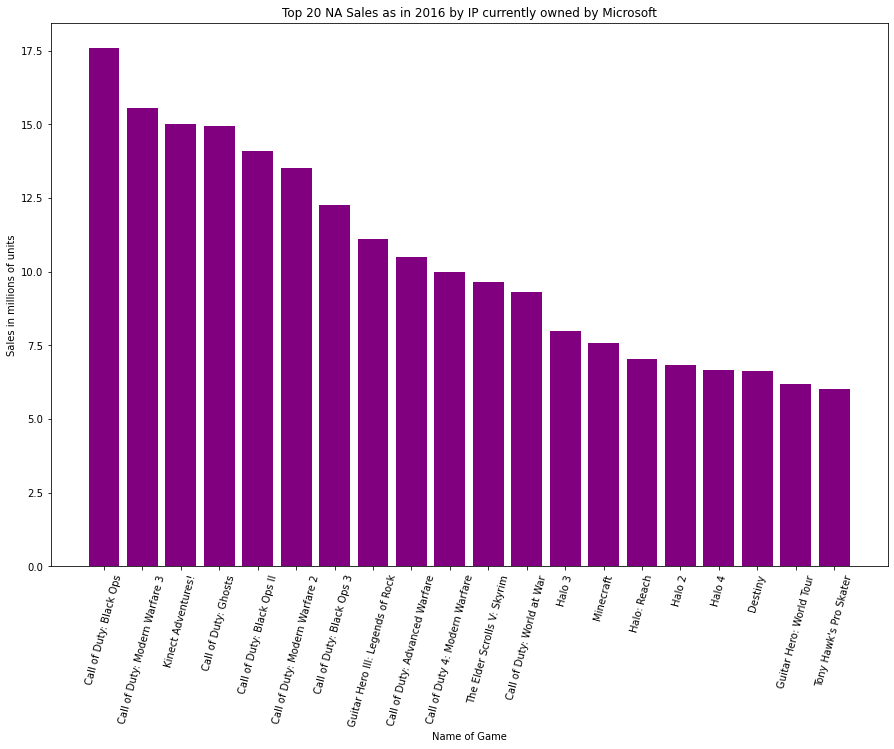

In [67]:
fig, ax = plt.subplots(figsize = (15,10))

ax.bar(x=Top_20_NAS['Name'],
       height=Top_20_NAS['NA_Sales'],
       color='purple')
ax.set_title("""Top 20 NA Sales as in 2016 by IP currently owned by Microsoft""")
ax.set_xlabel("Name of Game")
ax.set_ylabel("Sales in millions of units")
plt.xticks(rotation=75);

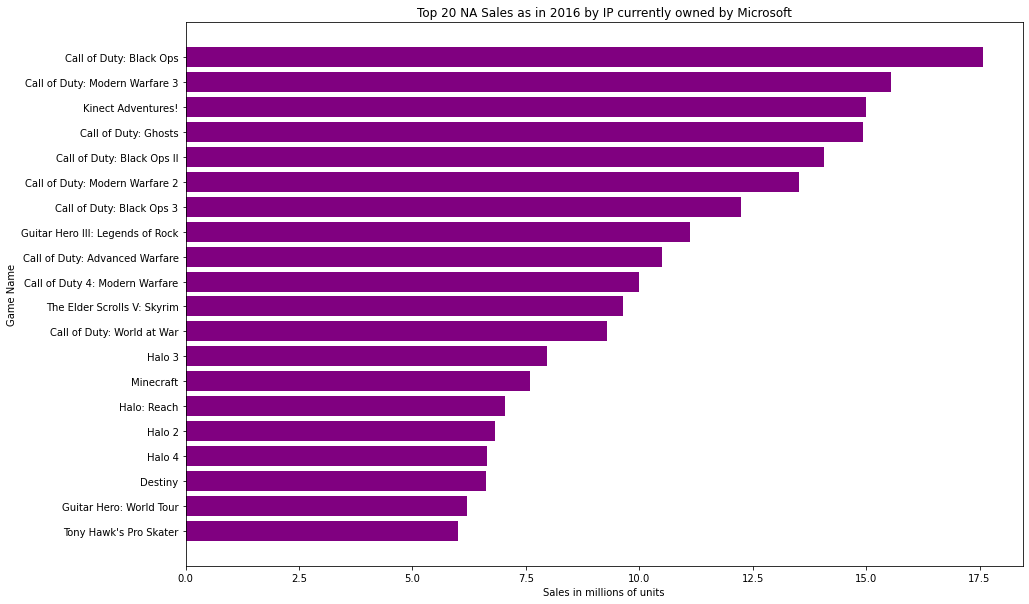

In [68]:
fig, ax = plt.subplots(figsize = (15,10))

ax.invert_yaxis()

ax.barh(y=Top_20_NAS['Name'],
       width=Top_20_NAS['NA_Sales'],
       color='purple')
ax.set_title("""Top 20 NA Sales as in 2016 by IP currently owned by Microsoft""")
ax.set_xlabel("Sales in millions of units")
ax.set_ylabel("Game Name");

# EU Sales Vizualizations

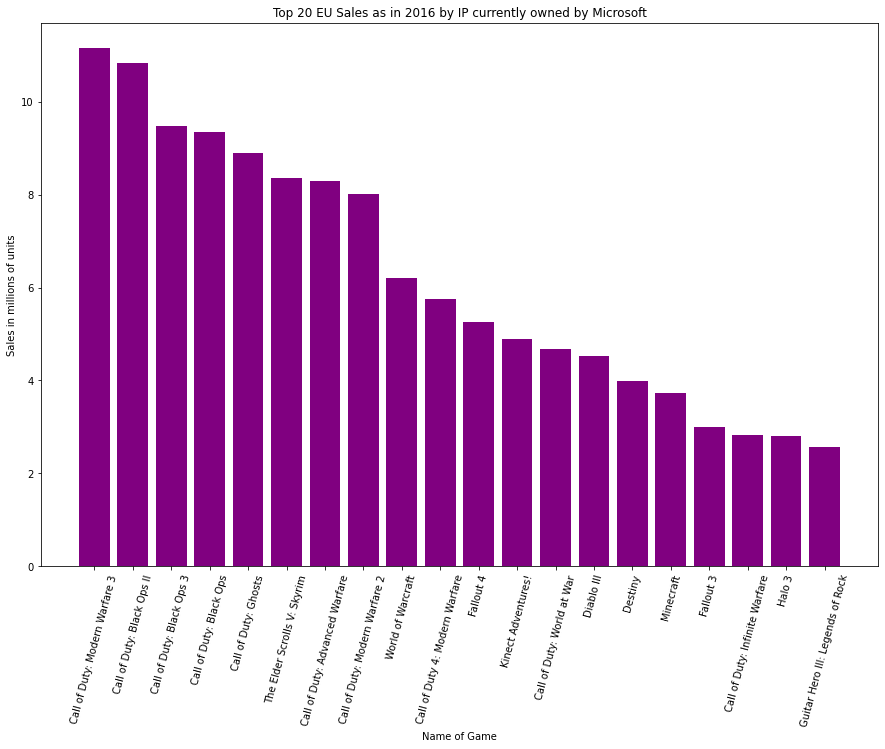

In [69]:
fig, ax = plt.subplots(figsize = (15,10))

ax.bar(x=Top_20_EUS['Name'],
       height=Top_20_EUS['EU_Sales'],
       color='purple')
ax.set_title("""Top 20 EU Sales as in 2016 by IP currently owned by Microsoft""")
ax.set_xlabel("Name of Game")
ax.set_ylabel("Sales in millions of units")
plt.xticks(rotation=75);

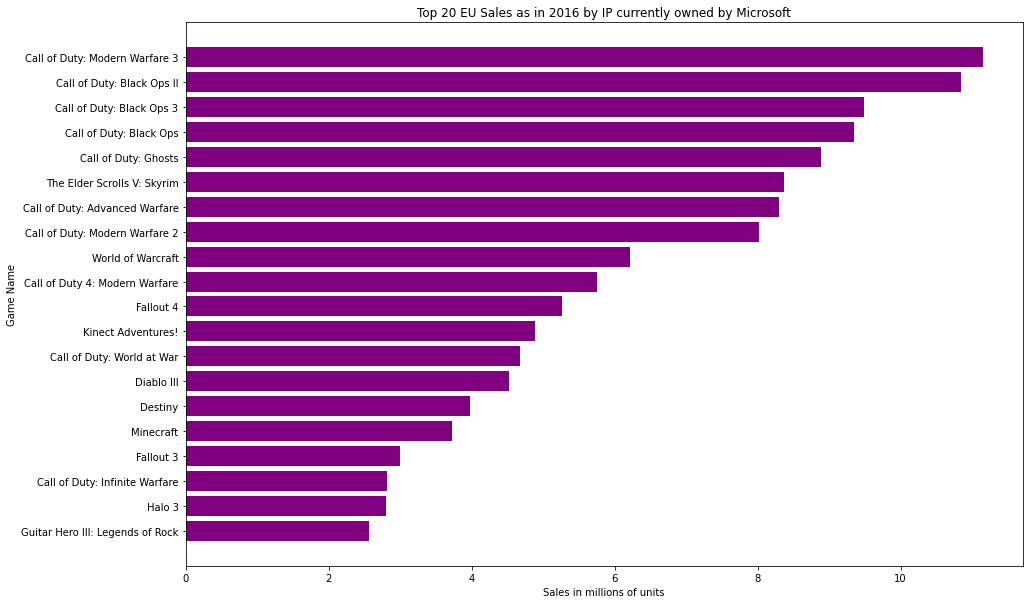

In [70]:
fig, ax = plt.subplots(figsize = (15,10))

ax.invert_yaxis()

ax.barh(y=Top_20_EUS['Name'],
       width=Top_20_EUS['EU_Sales'],
       color='purple')
ax.set_title("""Top 20 EU Sales as in 2016 by IP currently owned by Microsoft""")
ax.set_xlabel("Sales in millions of units")
ax.set_ylabel("Game Name");

# JP Sales Vizualizations 

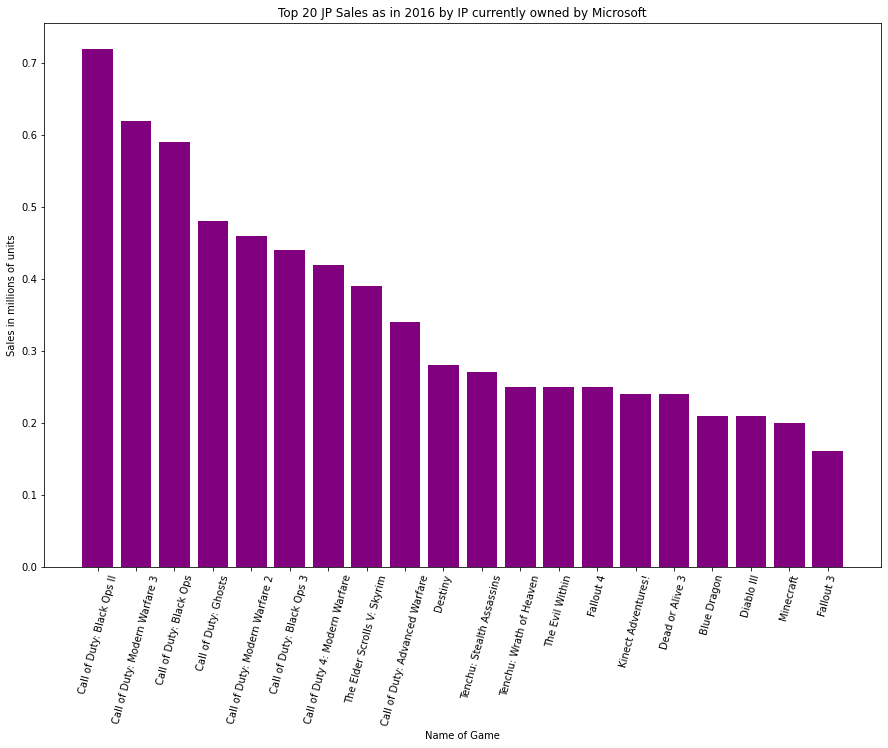

In [71]:
fig, ax = plt.subplots(figsize = (15,10))

ax.bar(x=Top_20_JPS['Name'],
       height=Top_20_JPS['JP_Sales'],
       color='purple')
ax.set_title("""Top 20 JP Sales as in 2016 by IP currently owned by Microsoft""")
ax.set_xlabel("Name of Game")
ax.set_ylabel("Sales in millions of units")
plt.xticks(rotation=75);

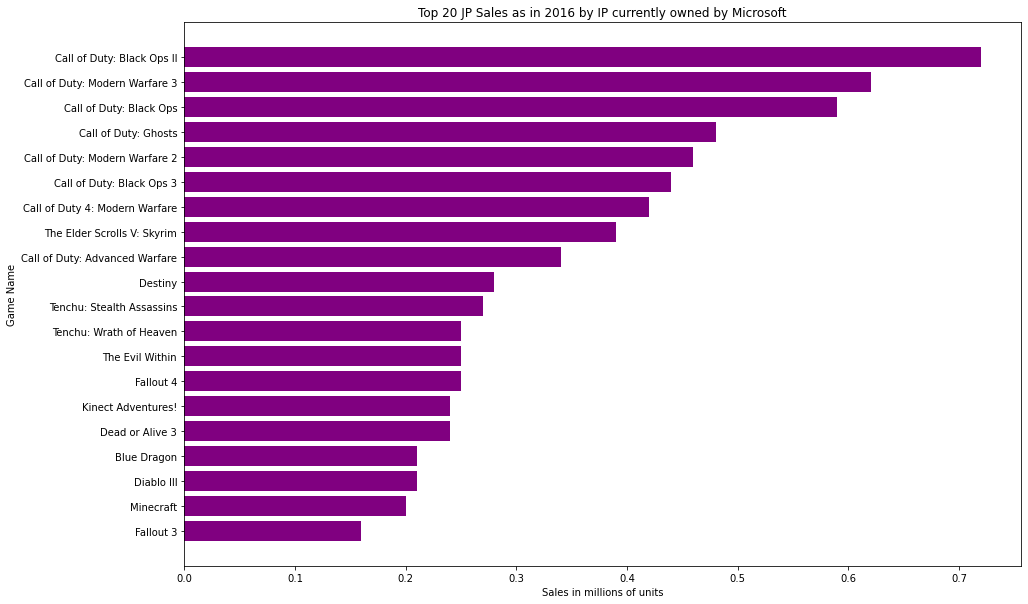

In [138]:
fig, ax = plt.subplots(figsize = (15,10))

ax.invert_yaxis()

ax.barh(y=Top_20_JPS['Name'],
       width=Top_20_JPS['JP_Sales'],
       color='purple')
ax.set_title("""Top 20 JP Sales as in 2016 by IP currently owned by Microsoft""")
ax.set_xlabel("Sales in millions of units")
ax.set_ylabel("Game Name");